In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

zip_path = '/content/drive/My Drive/Final Dataset of Telugu Handwritten Chararcters.zip'
extract_path = '/content/telugu_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify extraction
os.listdir(extract_path)

['Final Dataset of Telugu Handwritten Chararcters']

In [4]:
import os

extract_path = '/content/telugu_dataset'
print(os.listdir(extract_path))  # Should show ['Final Dataset of Telugu Handwritten Chararcters']

inner_folder = os.path.join(extract_path, 'Final Dataset of Telugu Handwritten Chararcters')
print(os.listdir(inner_folder))  # Should show ['Test1']

test1_path = os.path.join(inner_folder, 'Test1')
print(os.listdir(test1_path))  # Should show ['achulu', 'Guninthamulu', 'hallulu', 'othulu']

['Final Dataset of Telugu Handwritten Chararcters']
['Test1']
['Guninthamulu', 'othulu', 'achulu', 'hallulu']


In [5]:
import os
import numpy as np
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_images_from_folder(base_path):
    images = []
    labels = []
    label_map = {}
    class_idx = 0

    for main_folder in ['achulu', 'Guninthamulu', 'hallulu', 'othulu']:
        main_path = os.path.join(base_path, main_folder)
        if not os.path.exists(main_path):
            print(f"Folder not found: {main_path}")
            continue
        for subfolder in os.listdir(main_path):
            subfolder_path = os.path.join(main_path, subfolder)
            if os.path.isdir(subfolder_path) and os.listdir(subfolder_path):  # Check if folder exists and has files
                if subfolder not in label_map:
                    label_map[subfolder] = class_idx
                    class_idx += 1
                for img_name in os.listdir(subfolder_path):
                    if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):  # Filter valid image extensions
                        img_path = os.path.join(subfolder_path, img_name)
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is None:
                            print(f"Failed to load image: {img_path}")
                        else:
                            img = cv2.resize(img, (32, 32))
                            images.append(img)
                            labels.append(label_map[subfolder])
                            print(f"Loaded image: {img_path} (Label: {label_map[subfolder]})")
            else:
                print(f"Skipping empty or invalid folder: {subfolder_path}")

    if not images:
        print("No images were loaded. Check folder structure or file formats.")
    return np.array(images), np.array(labels), label_map

# Set the base path
base_path = '/content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1'
images, labels, label_map = load_images_from_folder(base_path)

# Normalize images (only if images are loaded)
if images.size > 0:
    images = images / 255.0
    images = images.reshape(-1, 32, 32, 1)
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    print("Number of classes:", len(label_map))
else:
    print("Cannot proceed: No valid images loaded.")

Streaming output truncated to the last 5000 lines.
Loaded image: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/sh/A_0_1767.jpeg (Label: 41)
Loaded image: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/sh/A_0_4300.jpeg (Label: 41)
Loaded image: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/sh/19.jpg (Label: 41)
Loaded image: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/sh/A_0_1158.jpeg (Label: 41)
Loaded image: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/sh/A_0_4173.jpeg (Label: 41)
Loaded image: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/sh/A_0_8025.jpeg (Label: 41)
Loaded image: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/sh/A_0_8461.jpeg (Label: 41)
Loaded image: /content/telugu_dataset/Final Dataset of Telug

In [6]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)
datagen.fit(X_train)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (38063, 32, 32, 1)
Testing set shape: (9516, 32, 32, 1)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(79, activation='softmax')  # 79 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 79)                  │          10,191 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 168,527 (658.31 KB)

 Trainable params: 168,527 (658.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1190/1190 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.0273 - loss: 4.1771 - val_accuracy: 0.0434 - val_loss: 3.9601
Epoch 2/100
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.0630 - loss: 3.8770 - val_accuracy: 0.1623 - val_loss: 3.2749
Epoch 3/100
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.1324 - loss: 3.4051 - val_accuracy: 0.2285 - val_loss: 2.9524
Epoch 4/100
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.1864 - loss: 3.1058 - val_accuracy: 0.2955 - val_loss: 2.5999
Epoch 5/100
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.2186 - loss: 2.8977 - val_accuracy: 0.3496 - val_loss: 2.3871
Epoch 6/100
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.2492 - loss: 2.7440 - val_accuracy: 0.3803 - val_loss: 2.2255
Epoch 7/100
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.2724 - loss: 2.6325 - val_accuracy: 0.4103 - val_loss: 2.0733
Epoch 8/100
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.2913 - los

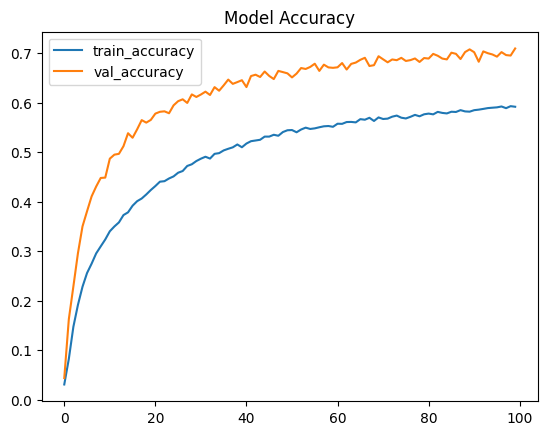

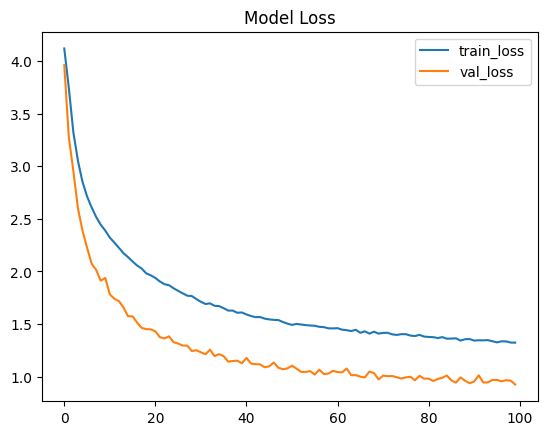

In [8]:
# Train the model
batch_size = 32
epochs = 100

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    epochs=epochs
)

# Plot training results
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [9]:
# Save the model
model.save('/content/drive/My Drive/telugu_character_recognition_model_epoch100.h5')

# Save the label map (if not already saved)
import pickle
with open('/content/drive/My Drive/label_map.pkl', 'wb') as f:
    pickle.dump(label_map, f)

print("Model and label map saved successfully.")

Model and label map saved successfully.


In [10]:
# Save in native Keras format
model.save('/content/drive/My Drive/telugu_character_recognition_model_epoch100.keras')
print("Model saved in .keras format.")

Model saved in .keras format.


In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7057 - loss: 0.9257
Test Accuracy: 70.91%


Epoch 101/140
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.6400 - loss: 1.1617 - val_accuracy: 0.7384 - val_loss: 0.8338
Epoch 102/140
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.6438 - loss: 1.1533 - val_accuracy: 0.7362 - val_loss: 0.8332
Epoch 103/140
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6412 - loss: 1.1489 - val_accuracy: 0.7348 - val_loss: 0.8297
Epoch 104/140
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.6463 - loss: 1.1426 - val_accuracy: 0.7382 - val_loss: 0.8281
Epoch 105/140
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.6414 - loss: 1.1502 - val_accuracy: 0.7399 - val_loss: 0.8271
Epoch 106/140
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.6367 - loss: 1.1525 - val_accuracy: 0.7359 - val_loss: 0.8327
Epoch 107/140
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.6396 - loss: 1.1508 - val_accuracy: 0.7350 - val_loss: 0.8365
Epoch 108/140
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/s

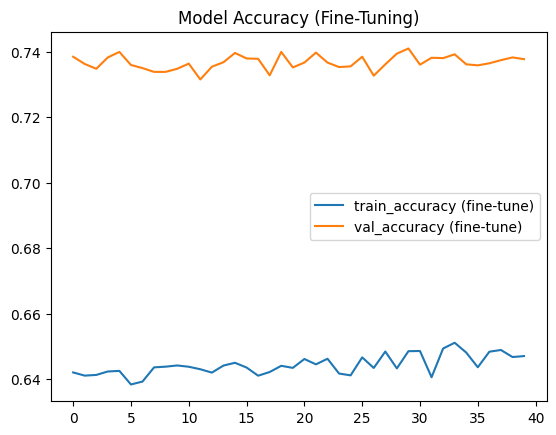

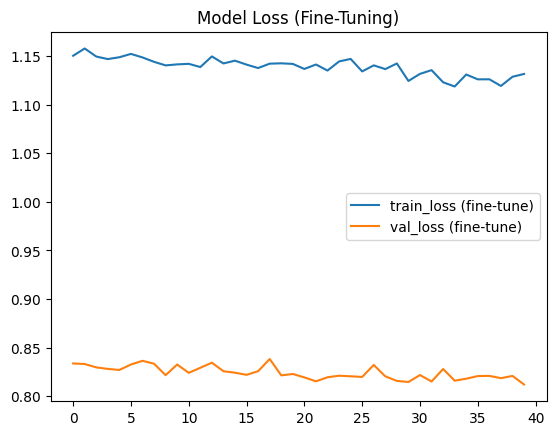

In [18]:
from tensorflow.keras.optimizers import Adam

# Reduce learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Continue training for additional epochs
additional_epochs = 40
history_finetune = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=additional_epochs + 100,
    initial_epoch=100
)

# Plot results
import matplotlib.pyplot as plt

plt.plot(history_finetune.history['accuracy'], label='train_accuracy (fine-tune)')
plt.plot(history_finetune.history['val_accuracy'], label='val_accuracy (fine-tune)')
plt.title('Model Accuracy (Fine-Tuning)')
plt.legend()
plt.show()

plt.plot(history_finetune.history['loss'], label='train_loss (fine-tune)')
plt.plot(history_finetune.history['val_loss'], label='val_loss (fine-tune)')
plt.title('Model Loss (Fine-Tuning)')
plt.legend()
plt.show()

In [13]:
# Evaluate the fine-tuned model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy after fine-tuning: {test_accuracy * 100:.2f}%")

298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7319 - loss: 0.8409
Test Accuracy after fine-tuning: 73.73%


In [19]:
# Save the fine-tuned model in .keras format
model.save('/content/drive/My Drive/telugu_character_recognition_model_finetuned.keras')
print("Fine-tuned model saved successfully in .keras format.")

Fine-tuned model saved successfully in .keras format.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


<ipython-input-20-09a79d47c7ce>:57: UserWarning: Glyph 3114 (\N{TELUGU LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-20-09a79d47c7ce>:57: UserWarning: Matplotlib currently does not support Telugu natively.
  plt.tight_layout()
<ipython-input-20-09a79d47c7ce>:57: UserWarning: Glyph 3128 (\N{TELUGU LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-20-09a79d47c7ce>:57: UserWarning: Glyph 3129 (\N{TELUGU LETTER HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-20-09a79d47c7ce>:57: UserWarning: Glyph 3096 (\N{TELUGU LETTER GHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


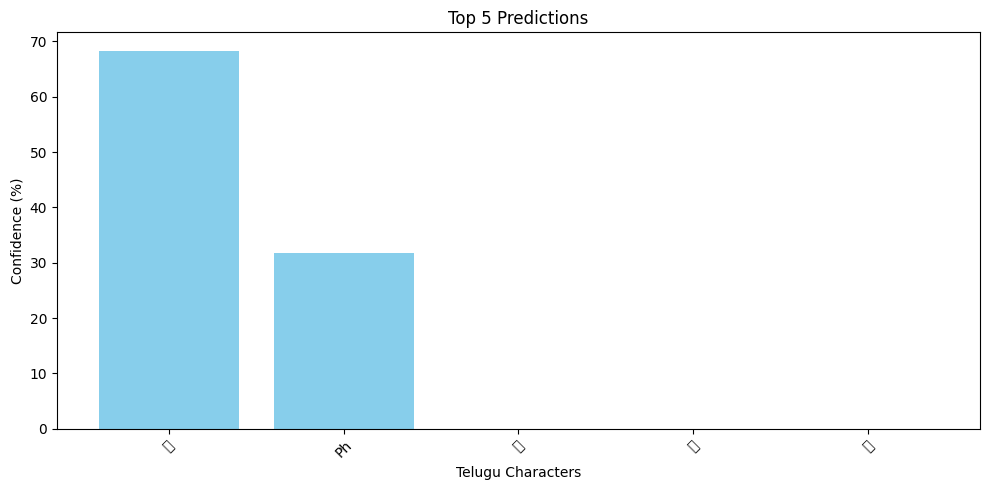

Predicted character: ప
Confidence score: 68.21%


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the English-to-Telugu mapping
english_to_telugu = {
    'a': 'అ', 'aa': 'ఆ', 'ah': 'అః', 'ai': 'ఐ', 'am': 'అం', 'ao': 'ఔ',
    'e': 'ఇ', 'ee': 'ఈ', 'i': 'ఎ', 'ii': 'ఏ', 'o': 'ఒ', 'oo': 'ఓ',
    'ru': 'ఋ', 'ruu': 'ౠ', 'u': 'ఉ', 'uu': 'ఊ',
    'ana': 'ణ', 'ba': 'బ', 'bha': 'భ', 'ch': 'చ', 'cha': 'ఛ',
    'd': 'డ', 'da': 'ద', 'dh': 'ఢ', 'dha': 'ధ', 'ga': 'గ', 'gha': 'ఘ',
    'ha': 'హ', 'ja': 'జ', 'jh': 'ఝ', 'kha': 'ఖ', 'ksh': 'క్ష',
    'I': 'ఇ', 'II': 'ఈ', 'ma': 'మ', 'na': 'న', 'pa': 'ప', 'pha': 'ఫ',
    'ra': 'ర', 'RR': 'ఱ', 'sa': 'స', 'sh': 'శ', 'sha': 'ష', 'ta': 'ట',
    'th': 'ఠ', 'tha': 'త', 'tt': 'ట్ట', 'va': 'వ', 'ya': 'య',
    'b': 'బ', 'bh': 'భ', 'g': 'గ', 'gh': 'ఘ', 'h': 'హ', 'in': 'న',
    'jha': 'ఝ', 'ka': 'క', 'ks': 'క్ష', 'm': 'మ', 'n': 'న', 'P': 'ప',
    'ph': 'ఫ', 'r': 'ర', 'rr': 'ఱ', 's': 'స', 'v': 'వ', 'y': 'య',
    'thah': 'థ', 'an': 'అం', 'c': 'చ', 'j': 'జ', 'k': 'క', 'kh': 'ఖ',
    'nn': 'ణ', 'pph': 'ఫ', 'z': 'జ'
}

# Updated prediction function with confidence and graph
def predict_image(img_path, model, label_map, english_to_telugu, top_n=5):
    # Load and preprocess the image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to load test image: {img_path}")
        return None, None, None

    img = cv2.resize(img, (32, 32)) / 255.0
    img = img.reshape(1, 32, 32, 1)

    # Get model prediction
    pred = model.predict(img)[0]  # Get probabilities for all classes
    pred_class = np.argmax(pred)  # Index of highest probability
    confidence = pred[pred_class] * 100  # Confidence score in percentage

    # Convert to Telugu label
    inv_label_map = {v: k for k, v in label_map.items()}
    english_label = inv_label_map[pred_class]
    telugu_label = english_to_telugu.get(english_label, english_label)

    # Get top N predictions for graphing
    top_indices = np.argsort(pred)[-top_n:][::-1]  # Top N indices in descending order
    top_probs = pred[top_indices] * 100  # Convert to percentage
    top_english_labels = [inv_label_map[idx] for idx in top_indices]
    top_telugu_labels = [english_to_telugu.get(label, label) for label in top_english_labels]

    # Plot the graph
    plt.figure(figsize=(10, 5))
    plt.bar(top_telugu_labels, top_probs, color='skyblue')
    plt.xlabel('Telugu Characters')
    plt.ylabel('Confidence (%)')
    plt.title(f'Top {top_n} Predictions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return telugu_label, confidence, pred

# Test with a sample image
sample_img_path = '/content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/hallulu/P/3.jpg'  # Replace with real path
predicted_char, confidence, _ = predict_image(sample_img_path, model, label_map, english_to_telugu)

if predicted_char is not None:
    print(f"Predicted character: {predicted_char}")
    print(f"Confidence score: {confidence:.2f}%")

In [21]:
# Save the model (already done, but repeat if needed)
model.save('/content/drive/My Drive/telugu_character_recognition_model_finetuned.keras')

# Save the English-to-Telugu mapping
import pickle
with open('/content/drive/My Drive/english_to_telugu_map.pkl', 'wb') as f:
    pickle.dump(english_to_telugu, f)

print("Model and mapping saved successfully.")

Model and mapping saved successfully.


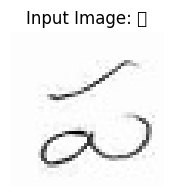

In [22]:
plt.figure(figsize=(2, 2))
plt.imshow(cv2.imread(sample_img_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f"Input Image: {predicted_char}")
plt.axis('off')
plt.show()